#Homework 1 - Optimization Methods 
Sudarut Kasemsuk

---









#1 Optimization problem 
Find the dimensions (height h and radius r) that will minimize the surface area of the metal \\
to manufacture a circular cylindrical can of volume V.


**Solution** \\
Since the function of the surface area of a cylinder is
$$ A = 2\pi r h + 2\pi r^2$$

We know that,
$$V = \pi r^2 h, \quad h = \frac{V}{\pi r^2}$$

The objective is to 
$$\underset{r, h \in \mathbb{R}}{min} \quad A$$

Then we have
\begin{split}
	A &= 2\pi r \frac{V}{\pi r^2} + 2\pi r^2 \\
	A  &= 2 \frac{V}{r} + 2\pi r^2 \\
  A^{'} &= -2Vr^{-2} + 4 \pi r \\
  0 &= -2Vr^{-2} + 4 \pi r
	\end{split}
So that, 
$$ r = \sqrt[3]{\frac{V}{2 \pi}}, \quad h = \sqrt[3]{\frac{4V}{\pi}} $$
By r and h are optimal values

---





#2 Optimally conditions
Consider the unconstrained optimization problem to minimize the function,
$$ f(x_1 , x_2) = \frac{3}{2}(x_1^2 + x_2^2) +(1+a)x_1x_2 - (x_1 + x_2) + b \quad \& \quad a, b \in \mathbb{R}$$
over $\mathbb{R^2}$, where $a$ and $b$ are real-valued parameters. Find all values of $a$ and $b$ such that the problem has a unique optimal solution.


**Solution** \\
Minimization of function $f^{'}(x_1, x_2) = 0$ and $ |H| > 0$ \\
where 

 $$
\det\begin{pmatrix}
     H 
\end{pmatrix} 
  = |H| =
\begin{vmatrix}
     f_{x_1x_1} & f_{x_1x_2}\\ 
     f_{x_2x_1} & f_{x_2x_2}
\end{vmatrix}
 $$
with $ f_{ij} = \frac{\partial ^2 f}{\partial x_i \partial x_j} $ and $f_{ii} = \frac{\partial ^2 f}{\partial x_i \partial x_i}$

Then 
 $$
|H| =
\begin{vmatrix}
     3 & 1+a\\ 
     1+a & 3 \\
\end{vmatrix}
= 9 - (1+a)^2 > 0
 $$
So, that $a \in (-4, 2), b \in \mathbb{R}$

---


#3 Nelder-Mead method 
Implement Nelder-Mead method for the Mishra's Bird function
$$
f(x, y) = \sin (y)e^{(1-\cos (x))^2} + \cos(x)e^{(1-\sin (y))^2} + (x-y)^2
$$
subjected to, 
$$
(x+5)^2 + (y+5)^2 < 25
$$
1. To illustrate the behavior of the method, plot simplex(triangle) for every iteration.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.patches import Circle

In [ ]:
#Mishra's Bird Function with constraint 
def F(x):
  if ((x[0]+5)**2 + (x[1]+5)**2) < 25:
    value = np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
  else:
    value = np.inf #divergence
  return value

In [ ]:
#Plot Contour
def f(x):
  f = np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
  return f;

def contour(f):
  x= np.linspace(-4*np.pi,2*np.pi,100)
  y= np.linspace(-4*np.pi,2*np.pi,100)
  X, Y = np.meshgrid(x, y)
  Z=f([X,Y])
  fig, ax = plt.subplots(figsize=(10, 8))
  CS = ax.contour(X, Y, Z, colors='black')
  ax.add_patch(Circle((-5, -5), 5, color='whitesmoke'))
  ax.set_title("Mishra's Bird Function")


In [ ]:
#To find f(B) < f(G) < f(W) which B is best, G is good and W is worst
def sort_function(d1, d2, d3):
  #list dots
  l_dots = [d1, d2, d3]

  #find values of function
  dots = [f(d1), f(d2), f(d3)]

  #sort values by return index
  sort = np.argsort(dots) 
  idx_b = sort[0]
  idx_g = sort[1]
  idx_w = sort[2]

  #define B, G, W 
  B = l_dots[idx_b]
  G = l_dots[idx_g]
  W = l_dots[idx_w]
  
  return B, G, W

In [ ]:
#Initialization, reflection α > 0 (default: 1)
def reflection(B, G, W, alpha):
  B = np.array(B)
  G = np.array(G)
  W = np.array(W)

  center = (B+G)/2
  R = center + alpha*(center - W)
  return R

In [ ]:
#Initialization, expansion γ > 0 (default: 2)
def expansion(B, G, W, R, gamma):
  B = np.array(B)
  G = np.array(G)
  W = np.array(W)

  center = (B+G)/2
  E = center + gamma*(R - center) 
  return E

In [ ]:
def shrink(B, G, W):
  W_new = (B+W)/2
  G_new = (B+G)/2

  return B, G_new, W_new 

In [ ]:
#Initialization, contraction β > 0 (default: 0.5)
def contraction(B, G, W, R, beta):
  B = np.array(B)
  G = np.array(G)
  W = np.array(W)

  center = (B+G)/2
  c_outside = center + beta*(R - center)
  c_inside = center + beta*(W - center)

  if f(c_outside) < f(R):
    W = c_outside
    #print(f'outside: {W}')
  elif f(c_inside) < f(R):
    W = c_inside
    #print(f'inside: {W}')
  else:
    B, G, W = shrink(B, G, W)
    #print(f'Shirnk: {B, G, W}')
  
  return B, G, W

In [ ]:
def Nelder_Mead(d1, d2, d3, alpha=1, beta=0.5, gamma=2):

  i = 0
  triangles = []

  calls = 0
  while i < 100:
    #(1) sort values of function
    B, G, W = sort_function(d1, d2, d3)
    #triangle(B, G, W)

    plt.plot([B[0],G[0],W[0],B[0]], [B[1],G[1],W[1],B[1]], "-.") 

    #(2) reflection
    R = reflection(B, G, W, alpha)

    if F(R) < F(G):
      if F(R) > F(B): # f(B) < f(R) <f(G) 
        W = R         # -> Accept R
        l1 = [B, G, W]
        triangles.append(l1)
        call += 1

    #(3) expansion
      else:           # f(R) < f(B) < f(G) 
        E = expansion(B, G, W, R, gamma)
        if F(E) < F(R):
          W = E       # -> Accept E 
          l1 = [B, G, W]
          triangles.append(l1)        

        else:
          W = R       # -> Accept R
          l1 = [B, G, W]
          triangles.append(l1)

    #(4) contraction/Shrink
    else:              # f(B) < f(G) < f(R)
      if F(R) > F(B):
        B, G, W = contraction(B, G, W, R, beta)
        l1 = [B, G, W]
        triangles.append(l1)

    #Update dots
    d1 = B
    d2 = G
    d3 = W

    i +=1
    #print(f'BGW:{B, G, W}')
    
  return triangles

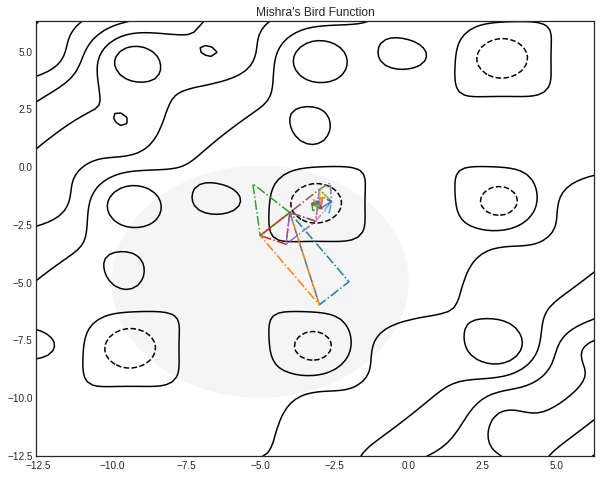

In [ ]:
d1 = [-2,-5] 
d2 = [-3,-6]  
d3 = [-4,-2]

contour(f)
triangles = Nelder_Mead(d1, d2, d3)

In [ ]:
print(f'Convergence  point is {triangles[-1][0]}')

Convergence  point is [-3.12286016 -1.58952886]


---

2 Demonstrate that the algorithm may converge to different points depending on the starting point. \\
Report explicitly two distinct starting points $x^0$ and the coresponding $x^*$.

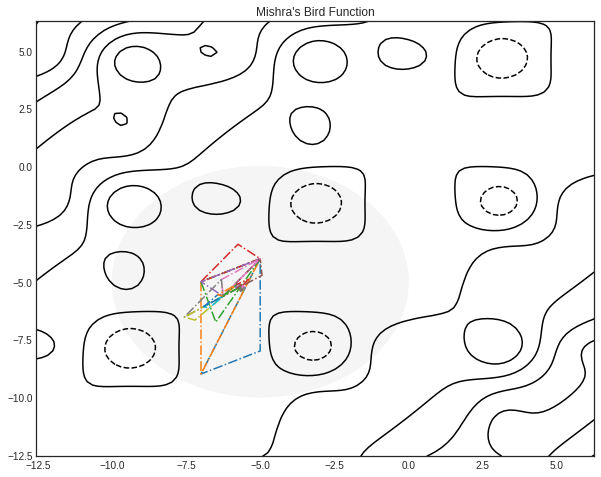

In [ ]:
p1=[-5,-8] 
p2=[-7,-9]
p3=[-5,-4]

contour(f)
triangles_two = Nelder_Mead(p1, p2, p3)

In [ ]:
print(f'Convergence point is {triangles_two[-1][0]}')

Convergence point is [-5.63253693 -5.36303736]


Since 3.1 and 3.2 use the different starting points for computing, you may see that they gave the different convergence point from function. \\
By 3.1 is [-3.12286016 -1.58952886] and 3.2 is [-5.63253693 -5.36303736]

---

3. Examine the behavior of the method for various parameters $\alpha, \beta, \gamma$. For one chosen $x^0$ show that the method may converge to different points. Report parameter values and $x^*$

As of alpha=0.5, beta=1, gamma=2, convergence point is [-3.12531447 -1.5914216 ]
As of alpha=1, beta=2, gamma=1, convergence point is [-3.13183594 -1.59082031]
As default values, convergence point is [-3.12286016 -1.58952886]


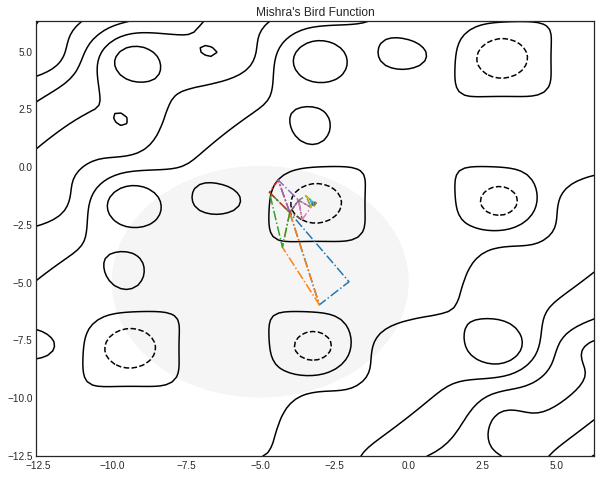

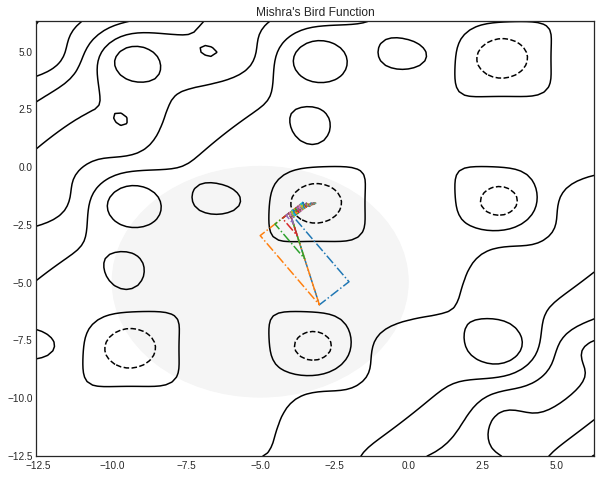

In [ ]:
dd1 = [-2,-5] 
dd2 = [-3,-6]  
dd3 = [-4,-2]

#Default values alpha=1, beta=0.5, gamma=2
contour(f)
triangles_three = Nelder_Mead(dd1, dd2, dd3, alpha=0.5, beta=1, gamma=2)
print(f'As of alpha=0.5, beta=1, gamma=2, convergence point is {triangles_three[-1][0]}')

contour(f)
triangles_four = Nelder_Mead(dd1, dd2, dd3, alpha=1, beta=2, gamma=1)
print(f'As of alpha=1, beta=2, gamma=1, convergence point is {triangles_four[-1][0]}')
print(f'As default values, convergence point is {triangles[-1][0]}')

$\begin{array}{lcc}
\hline & \text { $\alpha$ } & \text { $\gamma$ } & \text { $\beta$ }  & \text { point }\\
\hline \text { Default} & 1 & 2 & 0.5 & (-3.12286016, -1.58952886) \\
\text { case 1 } & 0.5 & 2 & 1  & (-3.12531447, -1.5914216 )  \\
\text { case 2 } & 1 & 1 & 2  & (-3.13183594, -1.59082031) \\
\hline
\end{array}$


You will see that changing $\alpha, \beta, \gamma $parameter gave a bit difference of points.

---


#4 Coordinate descent
Implement coordinate descent for $x^0$ and $f$ from Task 3. Compare the number of function evaluation(Oracle calls) for Nelder-Mead algorithm and coordinate descent. Report parameters of the algorithm. Attach your Jupyter notebook. Make a conclusion.

In [ ]:
def coordinate_descend_step(x0, F, k, gamma = 0.01, alpha = 0.01):
    n = x0.size
    i = k % n
    h = np.zeros_like(x0)
    h[i] = 1
    l1 = [x0[0] + alpha*h[0],x0[1] + alpha*h[1]]
    l2 = [x0[0],x0[1]]
    x = x0 - gamma*(F(l1) - F(l2))/alpha*h

    return x, k+1, alpha  #k+1 as function's called 2 times

In [ ]:
#define x0
x0 = np.array([-4, -4])

Function = []
x_list = []
Function.append(F(x0))
#x_list.append(x0)

x_next, k, alpha = coordinate_descend_step(x0, F, k=0)
Function.append(F(x_next))
#x_list.append(x_next)


#k=0
while np.linalg.norm(x_next - x0) > 1e-3:
    x0 = x_next
    x_next, k, alpha = coordinate_descend_step(x0, F, k, alpha)
    l = [x_next[0],x_next[1]]
    Function.append(F(l))
    x_list.append(l)
  



In [ ]:
print(f'Calls: {k}')

Calls: 59


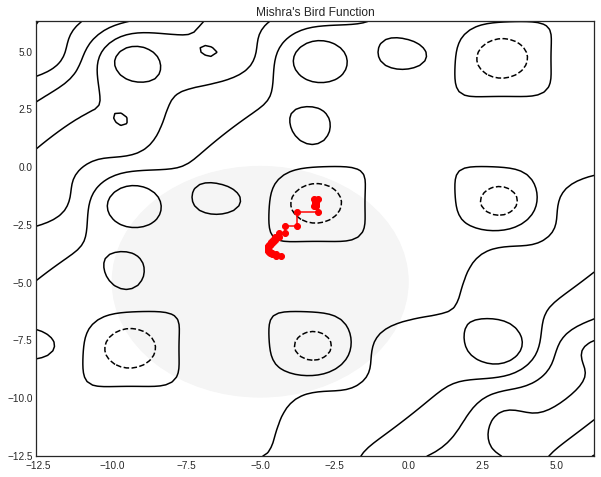

In [ ]:
x_list = np.array(x_list)
contour(f)
plt.plot(x_list[:,0], x_list[:,1], 'o-', color = 'r')

In [ ]:
x_list[-1]

array([-3.12812211, -1.59216598])

From problem 3 I fixed the iteration as 100 and I got convergence point is [-3.12286016 -1.58952886] and problem 4 I got 59 calls of function that make the result goes to minimum values as [-3.12812211, -1.59216598]. They are quite the same point but actually algorithm in problem 3 it's better than problem 4 because they go to optimal values before 59 calls and the point in calls 59 is [-3.12280797 -1.58957499].

In [ ]:
print(f'Convergence  point is {triangles[58][0]}')
print(f'Convergence  point is {triangles[59][0]}')

Convergence  point is [-3.12280797 -1.58957499]
Convergence  point is [-3.12280797 -1.58957499]
